### **Fontes de pesquisa:**
> **GitHub** 
- 

> **YouTube**
- 

> **Kaggle** 
- 

> **Artigos** 
- 

> **Notebooks** 
- https://nbviewer.org/github/programacaodinamica/machine-learning/blob/master/notebooks/M%C3%A1quinas%20de%20Vetores%20de%20Suporte%20%28SVM%29.ipynb

# **Conceitos SVM**

In [1]:
#importando bibliotecas essenciais
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import numpy as np

#datasets teste
from sklearn import datasets

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/luk3mn/TCC-predicao-de-series-temporais/master/dataset/pld_norte.csv')
# Removendo todos as virgulas do dataset
df.replace(',','.', regex=True, inplace=True)

# Convertendo a coluna "Data" em datetime
df['inicio_semana'] = pd.to_datetime(df['inicio_semana'])

# Tranformando a coluna "Data" em index
df.set_index('inicio_semana', inplace=True)

# Convertendo todos os objetos para valores numericos
c = df.select_dtypes(object).columns
df[c] = df[c].apply(pd.to_numeric,errors='coerce')
df.head()

,preco_pesado,preco_medio,preco_leve,geracao_hidraulica,geracao_termica,carga_energia,reservatorio_EARM,reservatorio_ENA
inicio_semana,,,,,,,,
2001-08-04,684.0,684.0,684.0,2952.29,0.0,2204.00,62.42,89.57
2001-08-11,684.0,684.0,684.0,2956.57,0.0,2141.57,59.75,88.57
2001-08-18,684.0,684.0,684.0,2909.71,0.0,2110.43,56.75,83.86
2001-08-25,684.0,684.0,684.0,2631.00,0.0,2095.43,53.63,79.29
2001-09-01,684.0,684.0,684.0,2558.86,0.0,2069.14,50.64,76.00


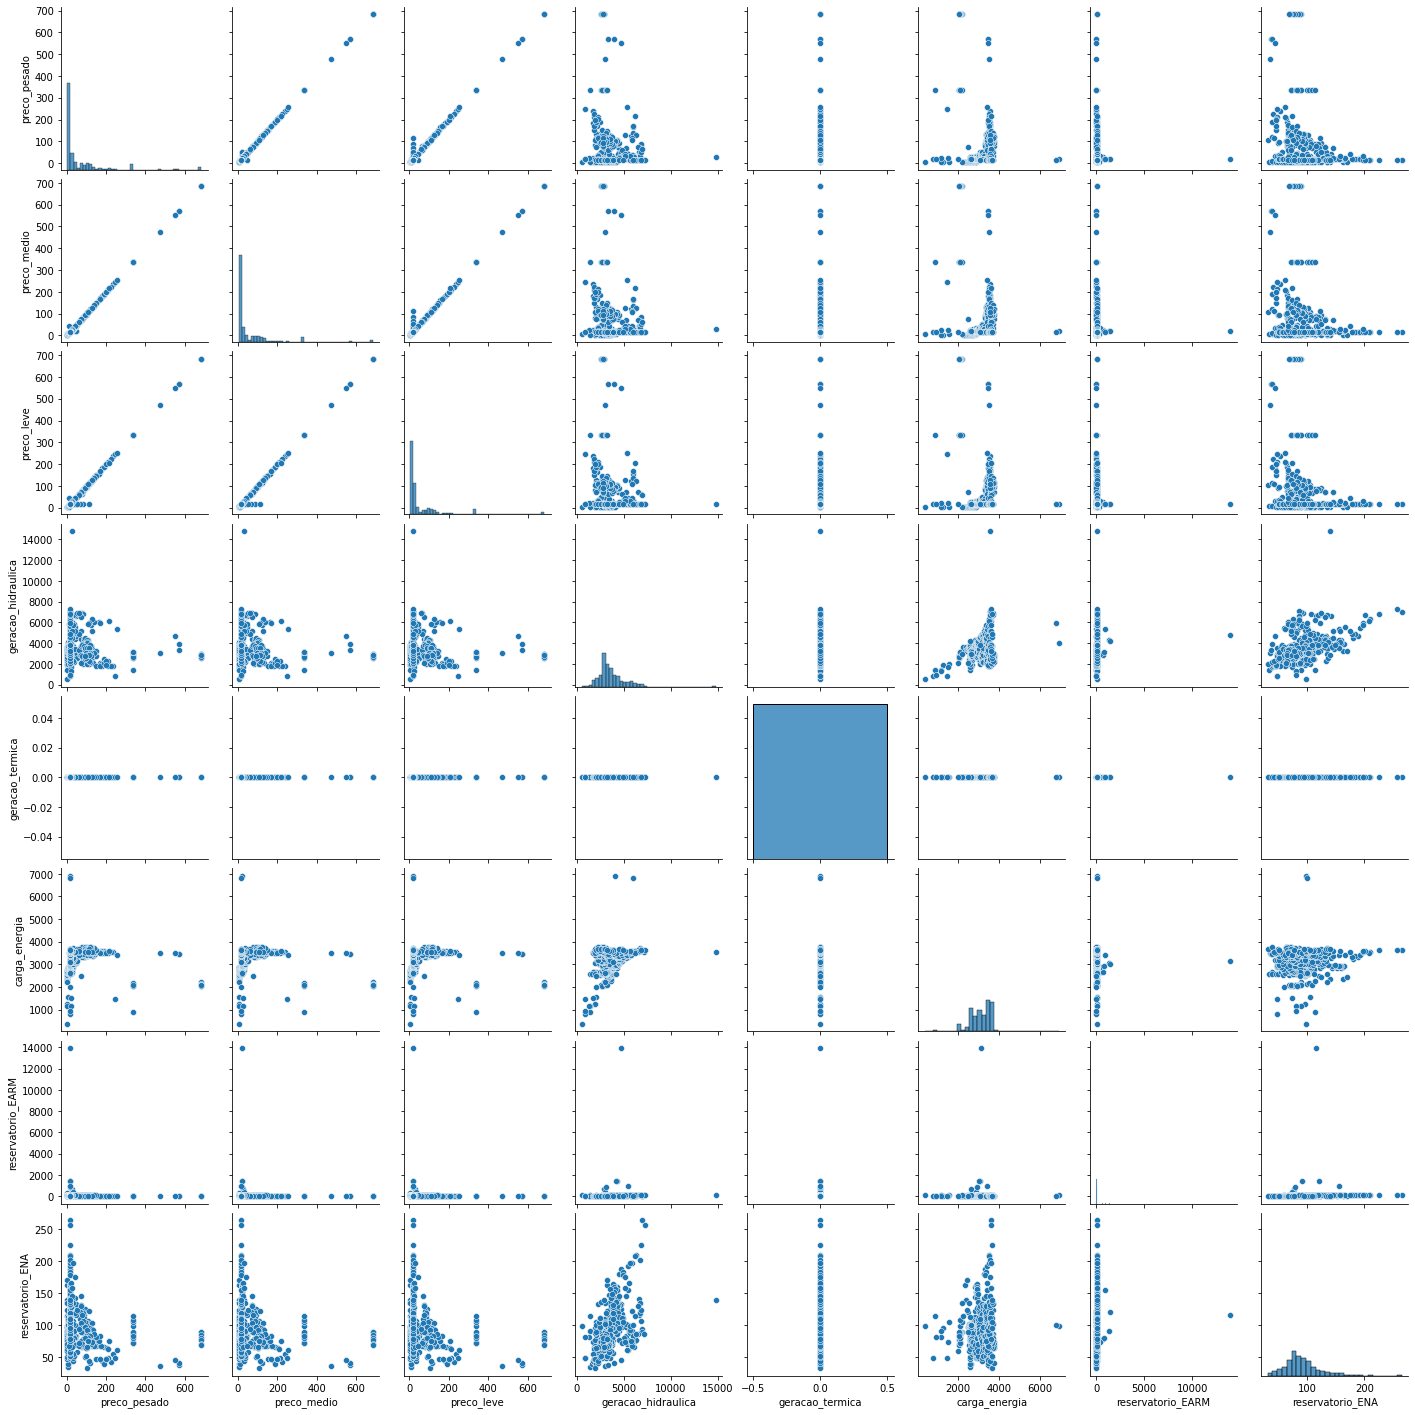

In [9]:
#sns.pairplot(df[['preco_pesado', 'preco_medio', 'preco_leve']])
sns.pairplot(df)

In [3]:
df.corr()

,preco_pesado,preco_medio,preco_leve,geracao_hidraulica,geracao_termica,carga_energia,reservatorio_EARM,reservatorio_ENA
preco_pesado,1.000000,0.999664,0.997876,-0.151400,NaN,-0.143442,-0.037885,-0.223539
preco_medio,0.999664,1.000000,0.998250,-0.152013,NaN,-0.145306,-0.037716,-0.225362
preco_leve,0.997876,0.998250,1.000000,-0.168138,NaN,-0.151919,-0.037272,-0.228682
geracao_hidraulica,-0.151400,-0.152013,-0.168138,1.000000,NaN,0.396442,0.065619,0.471737
geracao_termica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
carga_energia,-0.143442,-0.145306,-0.151919,0.396442,NaN,1.000000,0.009519,0.083195
reservatorio_EARM,-0.037885,-0.037716,-0.037272,0.065619,NaN,0.009519,1.000000,0.061675
reservatorio_ENA,-0.223539,-0.225362,-0.228682,0.471737,NaN,0.083195,0.061675,1.000000


In [ ]:
df.describe()

,preco_pesado,preco_medio,preco_leve,geracao_hidraulica,geracao_termica,carga_energia,reservatorio_EARM,reservatorio_ENA
count,443.000000,443.000000,443.000000,443.000000,443.0,443.000000,443.000000,443.000000
mean,67.246230,66.659323,65.398691,3636.017111,0.0,3091.663160,106.439029,93.003341
std,115.741691,115.684964,115.785227,1347.106555,0.0,588.284768,669.094780,33.655464
min,4.000000,4.000000,4.000000,539.000000,0.0,376.430000,8.730000,31.860000
25%,16.310000,16.310000,16.310000,2839.570000,0.0,2743.215000,39.620000,72.860000
50%,18.590000,18.590000,18.590000,3382.140000,0.0,3165.430000,67.200000,87.290000
75%,76.965000,75.040000,71.725000,4235.785000,0.0,3512.930000,87.200000,105.360000
max,684.000000,684.000000,684.000000,14795.000000,0.0,6922.290000,13948.340000,264.430000


In [8]:
df.dtypes

preco_pesado          float64
preco_medio           float64
preco_leve            float64
geracao_hidraulica    float64
geracao_termica       float64
carga_energia         float64
reservatorio_EARM     float64
reservatorio_ENA      float64
dtype: object

Text(0.5, 0, 'Periodo Observado')

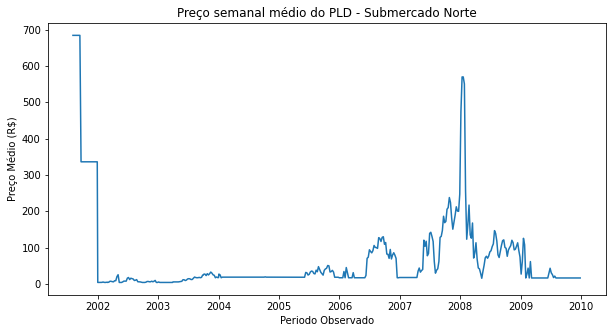

In [10]:
fig = plt.subplots(figsize=(10,5))
plt.plot(df['preco_medio'])
plt.title("Preço semanal médio do PLD - Submercado Norte")
plt.ylabel("Preço Médio (R$)")
plt.xlabel("Periodo Observado")